# Linear Regression Model

In [13]:
using CSV, DataFrames, Plots

Load data from data.csv file.

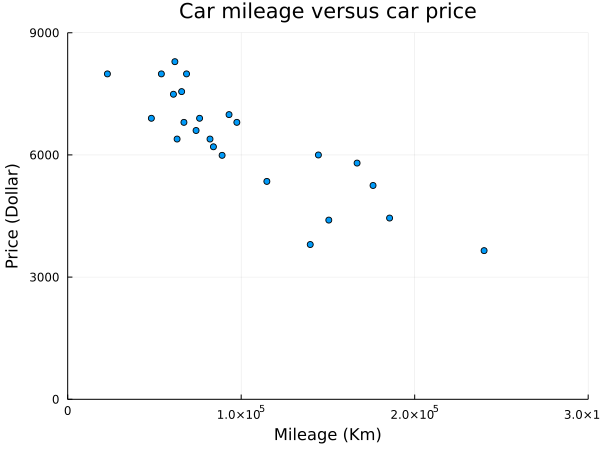

In [14]:
data = CSV.File("data.csv") |> DataFrame
X = data[1:end, 1]
Y = data[1:end, 2]
gr(size = (600, 450))
plot(X, Y, xlims=(0, 300000), ylims=(0, 9000), ylabel="Price (Dollar)",
	xlabel="Mileage (Km)", legend = false,
	title="Car mileage versus car price", seriestype=:scatter)

Initialize parameters

In [15]:
θ0 = 0.0
θ1 = 0.0
learning_rate = 0.1
m = length(X)

24

Define our linear regression model

In [16]:
f(X) = θ0 .+ θ1 * X

f (generic function with 1 method)

Data Normalization.

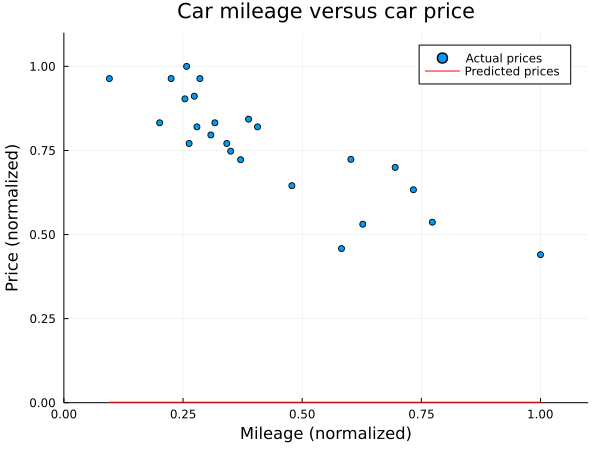

In [17]:
maxX = max(X...)
maxY = max(Y...)
X = X ./ maxX
Y = Y ./ maxY
plot(X, Y, xlims=(0, 1.1), ylims=(0, 1.1), ylabel="Price (normalized)",
    xlabel="Mileage (normalized)", label="Actual prices",
    title="Car mileage versus car price", seriestype=:scatter)
display(plot!(X, f(X), label = "Predicted prices", lw=2, color=:red))

Define the mean squared error (MSE) cost function.

In [18]:
cost(θ0, θ1) = (1 / 2m) * sum((f(X) - Y) .^ 2)
cost(θ0, θ1)

0.3038311057062467

Train the model using gradient descent algorithm.

In [19]:
epoch = 0
cost_history = []
push!(cost_history, cost(θ0, θ1))
while epoch <= 1000
	tmp_θ0 = (1 / m) * sum(f(X) - Y)
	tmp_θ1 = (1 / m) * sum(X .* (f(X) - Y))
	global θ0 -= learning_rate * tmp_θ0
	global θ1 -= learning_rate * tmp_θ1
	push!(cost_history, cost(θ0, θ1))
	global epoch += 1
end

Plot the data again.

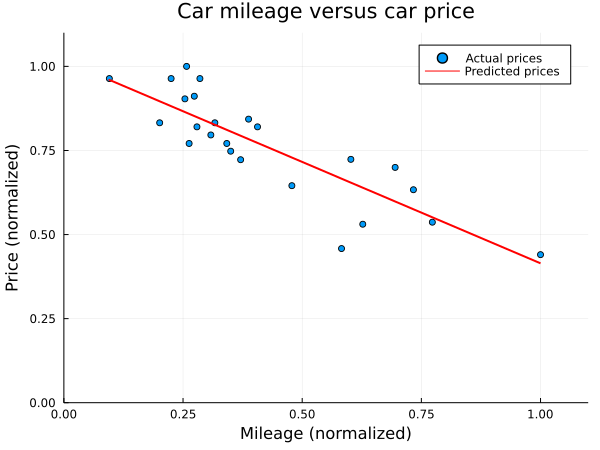

In [20]:
plot(X, Y, xlims=(0, 1.1), ylims=(0, 1.1), ylabel="Price (normalized)",
	xlabel="Mileage (normalized)", label="Actual prices",
	title="Car mileage versus car price", seriestype=:scatter)
display(plot!(X, f(X), label = "Predicted prices", lw=2, color=:red))

Adjust theta_0 and theta_1.

In [21]:
θ0 *= maxY
θ1 *= maxY / maxX

-0.020826624110368782

Display cost function values.

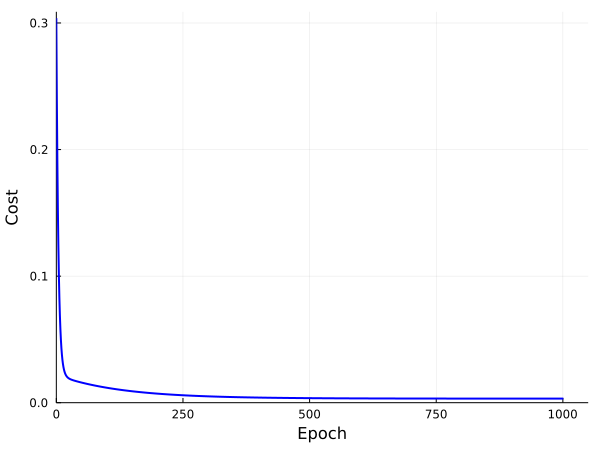

In [22]:
display(plot(0:epoch, cost_history, xlims = (0, 1050),
	ylims = (0, cost_history[1] + 0.005), xlabel="Epoch",
	ylabel="Cost", legend = false, lw=2, color=:blue))

Do some predictions.

In [23]:
println("real value: 3650\tprediction: $(f(240000))")
println("real value: 4400\tprediction: $(f(150500))")
println("real value: 6800\tprediction: $(f(67000))")

real value: 3650	prediction: 3435.761736097633
real value: 4400	prediction: 5299.744593975638
real value: 6800	prediction: 7038.767707191432
